In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

# This is used as a hack in Jupyter Notebook to make seabron plots bigger. Call before making a plot.
def setplt(r=1, c=1, w=15, h=9, **kwargs):
    f, axs = plt.subplots(r, c, figsize=(w, h), **kwargs)
    sns.despine(f, left=True, bottom=True)
    return axs

# Welcome to Data Visualization! 

### Our Datasets 

We are using a pokemon dataset from Kaggle and a bike share data set that was extracted from [Capital Bike Share data](https://www.capitalbikeshare.com/system-data).

### Our Procedure

We are going to go over categorical data approaches and time series data approaches. 

### Step 1? Load in the Data

In [2]:
pokemon = pd.read_csv('pokemon.csv')
fivebikes = pd.read_csv('fivebikes.csv')

## Categorical Data 

We're going to use pokemon data to play around with categorical plotting. When we are plotting non-quantitative values, we want to focus on bar graphs, heat maps, and flow charts. Aggregating our data gives more options, but our options for categorical data are limited. 

![Screen%20Shot%202018-10-21%20at%2010.31.28%20PM.png](attachment:Screen%20Shot%202018-10-21%20at%2010.31.28%20PM.png)

In [3]:
pokemon.head() # Print out the first few lines of data 

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Countplot

A seaborn technique that will group data for us automatically. 

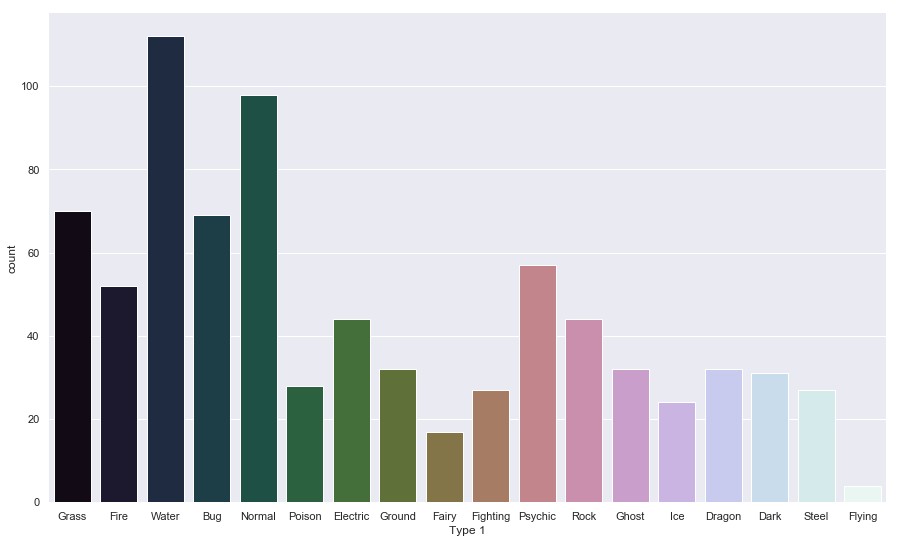

In [5]:
setplt() # Our hack from earlier

countplt = sns.countplot(x = 'Type 1', data = pokemon, palette='cubehelix')

### Heatmaps

Let's experiment with pivot tables to make heatmaps. 

In [6]:
# pd.pivot_table(data, values, index, columns, aggfunc) # This is our function
pd.pivot_table(pokemon, values='Total', index='Type 1', columns=['Generation'], aggfunc='count')


Generation,1,2,3,4,5,6
Type 1,,,,,,
Bug,14.0,12.0,12.0,10.0,18.0,3.0
Dark,NaN,6.0,6.0,3.0,13.0,3.0
Dragon,3.0,NaN,12.0,4.0,9.0,4.0
Electric,9.0,7.0,5.0,12.0,8.0,3.0
Fairy,2.0,5.0,NaN,1.0,NaN,9.0
Fighting,7.0,2.0,5.0,3.0,7.0,3.0
Fire,14.0,8.0,8.0,5.0,9.0,8.0
Flying,NaN,NaN,NaN,NaN,2.0,2.0
Ghost,4.0,1.0,5.0,7.0,5.0,10.0


In [9]:
genpivot = pd.pivot_table(pokemon, values='Total', index='Type 1', columns=['Generation'], aggfunc='mean')
legpivot = pd.pivot_table(pokemon, values='Attack', index='Type 1', columns=['Legendary'], aggfunc='mean')

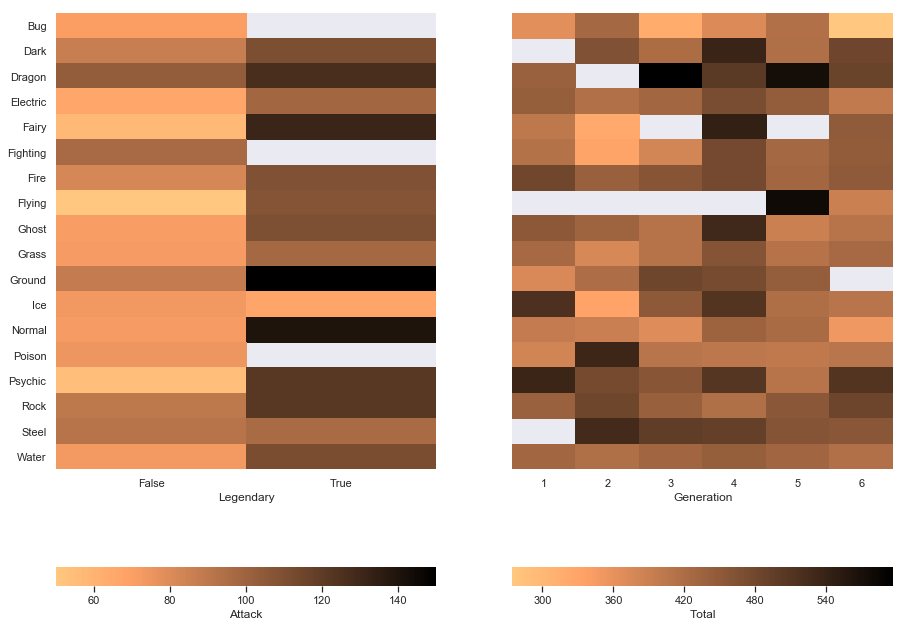

In [11]:
plt2 = setplt(1,2, h=12, sharey=True, squeeze=True)


heatmap1 = sns.heatmap(genpivot, ax=plt2[1], cmap='copper_r', 
                       cbar_kws={'label': 'Total', 'orientation':'horizontal'}).set(ylabel='')
heatmap2 = sns.heatmap(legpivot, ax=plt2[0], cmap='copper_r', 
                       cbar_kws={'label': 'Attack', 'orientation':'horizontal'}).set(ylabel='')

## Time Series Visualization

We're going to be looking at time series data from a bike share company in Washington, D.C. Time series data is fun to visualize because it's easy for a wide audience to understand and is visually pleasing. 

![Screen%20Shot%202018-10-21%20at%2010.44.42%20PM.png](attachment:Screen%20Shot%202018-10-21%20at%2010.44.42%20PM.png)

In [12]:
# first we need to convert our week columnd into date time using pd.to_datetime
fivebikes['week'] = pd.to_datetime(fivebikes['week'], utc=True)

In [13]:
fivebikes.groupby('week')

fivebikes.groupby('week').mean()

fivebikes.groupby('week').mean()['sum']

week
2015-12-28 05:00:00+00:00    17597.50
2016-01-04 05:00:00+00:00    13457.00
2016-01-11 05:00:00+00:00    18189.60
2016-01-18 05:00:00+00:00     4714.25
2016-01-25 05:00:00+00:00     5235.00
2016-02-01 05:00:00+00:00    13175.40
2016-02-08 05:00:00+00:00     8346.50
2016-02-15 05:00:00+00:00    12675.60
2016-02-22 05:00:00+00:00     9983.20
2016-02-29 05:00:00+00:00    11559.60
2016-03-07 05:00:00+00:00    31739.40
2016-03-14 04:00:00+00:00    35961.40
2016-03-21 04:00:00+00:00    35086.40
2016-03-28 04:00:00+00:00    23904.20
2016-04-04 04:00:00+00:00    20688.60
2016-04-11 04:00:00+00:00    36357.80
2016-04-18 04:00:00+00:00    27853.20
2016-04-25 04:00:00+00:00    25116.20
2016-05-02 04:00:00+00:00    12992.20
2016-05-09 04:00:00+00:00    33534.75
2016-05-16 04:00:00+00:00    20558.00
2016-05-23 04:00:00+00:00    39084.80
2016-05-30 04:00:00+00:00    26252.50
2016-06-06 04:00:00+00:00     9105.80
2016-06-13 04:00:00+00:00    45971.40
2016-06-20 04:00:00+00:00    50369.40
2016-06

In [ ]:
# Group by week and then assign a dataframe called fivebikeavg that has one column for 'sum'

# fivebikes.groupby('week')...

In [15]:
fivebikeavg = fivebikes.groupby('week').mean()['sum']

Text(0.5,1,'Total Minutes per Week per Bike vs. Date ')

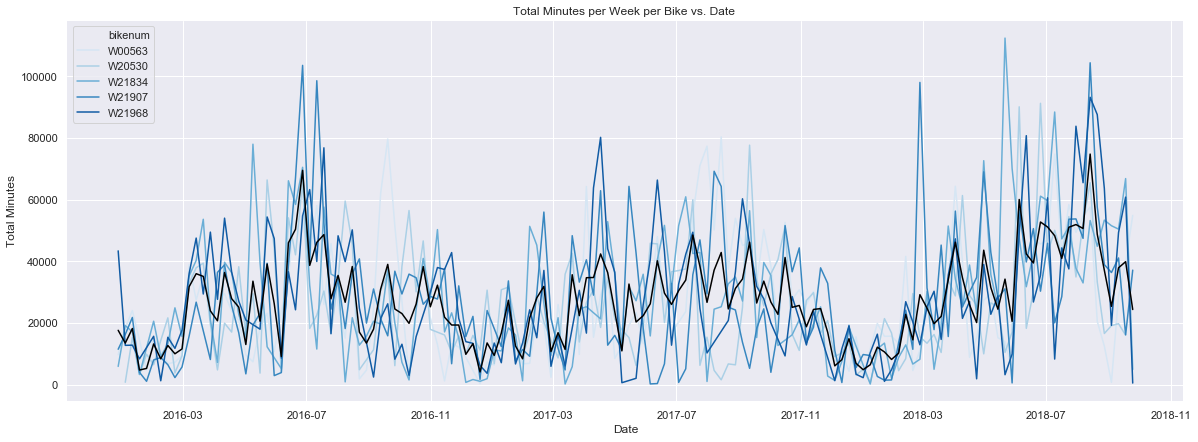

In [16]:
# Using our function from earlier
plt3 = setplt(w=20, h=7)

# Assign the graphs
fivebikeseries = (sns.lineplot(x='week', y='sum', hue='bikenum', data=fivebikes, palette='Blues', ax=plt3)
             .set(ylabel='Total Minutes', xlabel='Date'))

bikeavg = sns.lineplot(data=fivebikeavg, color='black')


# Set the title
plt3.set_title('Total Minutes per Week per Bike vs. Date ')

Now we're going to look at one individual bike and use a filter function. 

In [ ]:
# Filter by the bikenum = 'W21834' and assign it to a dataframe called onebike

# fivebikes['bikenum']... 

In [26]:
onebike = fivebikes[fivebikes['bikenum'] == 'W21834']

In [27]:
# Importing some libraries to smooth our data

from scipy.signal import savgol_filter
from scipy import signal

x = onebike['week']

filter_order = 4 #specifies how many filter coefficients should be used
filter_cutoff = (1/14) # inverse of the time interval in the timeseries

coef1, coef2 = signal.butter(filter_order, filter_cutoff, btype='lowpass')

y = signal.filtfilt(coef1,coef2,onebike['sum'])

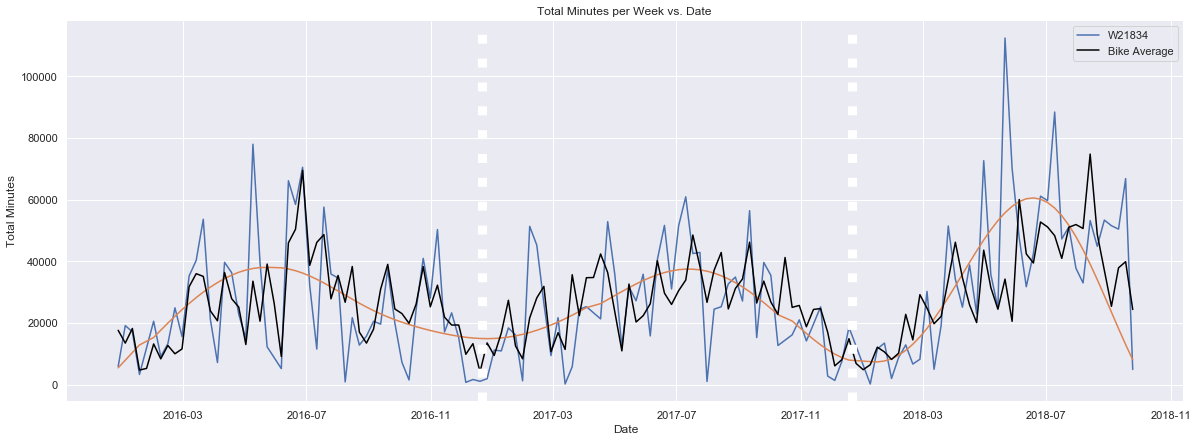

In [28]:
# Putting it all together, plotting winter solstices

plt4 = setplt(w=20, h=7)

oneseries = (sns.lineplot(x='week', y='sum', data=onebike, palette='Blues', label='W21834'))
filtered = sns.lineplot(x, y, palette='Oranges')
bikeavg = sns.lineplot(data=fivebikeavg, color='black', label='Bike Average')

oneseries.set(xlabel='Date', ylabel='Total Minutes')

plt4.set_title('Total Minutes per Week vs. Date ')
plt4.legend()

for t in ['2016-12-21', '2017-12-21']:
    plt.axvline(t, color='white', linewidth=9, linestyle=':')